#### Levels

In this notebook we'll take a look at how to run `et_look` at different levels than the standard `level_1`.

In [1]:
!pip install pywapor==2.5.0 --quiet

First we redefine some of the basic inputs variables that we've also seen in the previous notebooks.

In [2]:
import pywapor

project_folder = r"/Users/hmcoerver/pywapor_notebooks_2"
latlim = [28.9, 29.7]
lonlim = [30.2, 31.2]
timelim = ["2021-07-01", "2021-07-11"]
composite_length = "DEKAD"

##### Level-2 inputs

Now that we have run ETLook for a simple use case, we'll have a look at how to run it at different levels and with different input datasets.

When downloading input data with `pywapor.pre_et_look.main` as we did before, it is possible to select a level for which to download data. By default, this level is set to `level_1`.

We can have a closer look at what this actually means by running the following functions.






In [3]:
level = "level_1"
sources = pywapor.general.levels.pre_et_look_levels(level)
sources

{'ndvi': {'products': [{'source': 'MODIS',
    'product_name': 'MOD13Q1.061',
    'enhancers': 'default',
    'is_example': True},
   {'source': 'MODIS', 'product_name': 'MYD13Q1.061', 'enhancers': 'default'}],
  'composite_type': 'mean',
  'temporal_interp': 'linear',
  'spatial_interp': 'nearest'},
 'r0': {'products': [{'source': 'MODIS',
    'product_name': 'MCD43A3.061',
    'enhancers': 'default'}],
  'composite_type': 'mean',
  'temporal_interp': 'linear',
  'spatial_interp': 'bilinear'},
 'se_root': {'products': [{'source': functools.partial(<function se_root at 0x7f85c0f6fee0>, bin_length='DEKAD', sources='level_1'),
    'product_name': 'v2',
    'enhancers': 'default'}],
  'composite_type': 'max',
  'temporal_interp': 'linear',
  'spatial_interp': 'bilinear'},
 'p': {'products': [{'source': 'CHIRPS',
    'product_name': 'P05',
    'enhancers': 'default'}],
  'composite_type': 'mean',
  'temporal_interp': 'linear',
  'spatial_interp': 'bilinear'},
 'z': {'products': [{'source':

This dictionary specifices for each variable which products are used (and configures a couple of other settings that we'll deal with in the next notebook). Let's have a closer look at the sources for `ndvi`.

In [4]:
sources["ndvi"]

{'products': [{'source': 'MODIS',
   'product_name': 'MOD13Q1.061',
   'enhancers': 'default',
   'is_example': True},
  {'source': 'MODIS', 'product_name': 'MYD13Q1.061', 'enhancers': 'default'}],
 'composite_type': 'mean',
 'temporal_interp': 'linear',
 'spatial_interp': 'nearest'}

You can see that at `level_1`, `ndvi` data comes from two products, i.e. `MODIS.MOD13Q1.061` and `MODIS.MYD13Q1.061`. In a similar way you can check the sources for other variables, e.g. try running `sources["r0"]`. Also note that `MODIS.MOD13Q1.061` has a property called `is_example`. This property defines which product is used to align all the other datasets spatially.

Let's have a look at the datasets used for `ndvi` and `r0` at `level_2`.

In [5]:
sources = pywapor.general.levels.pre_et_look_levels("level_2")
sources["ndvi"]

{'products': [{'source': 'PROBAV',
   'product_name': 'S5_TOC_100_m_C1',
   'enhancers': 'default',
   'is_example': True}],
 'composite_type': 'mean',
 'temporal_interp': 'linear',
 'spatial_interp': 'nearest'}

In [6]:
sources["r0"]

{'products': [{'source': 'PROBAV',
   'product_name': 'S5_TOC_100_m_C1',
   'enhancers': 'default'}],
 'composite_type': 'mean',
 'temporal_interp': 'linear',
 'spatial_interp': 'nearest'}

As you can see, the difference between `level_1` and `level_2` is the dataset used to create the NDVI and ALBEDO inputs. For `level_2`, they are derived from PROBA-V images, which have a higher resolution (~100m) than the MODIS products (~250m for NDVI).

Let's give `level_2` a try! 

> ⚠️  
>
> You'll notice that you'll be prompted for another username and password. This time for a [VITO account](https://www.vito-eodata.be/PDF/portal/Application.html). We could set this account up by running `pywapor.collect.setup_dl_accounts.setup_account("VITO")` as well (like we did before for the NASA and WAPOR accounts). But `pywapor.pre_et_look.main` also checks if the required accounts can be found and gives a prompt if thats's not the case. 
>
>You can create a VITO account [here](https://www.vito-eodata.be/PDF/portal/Application.html).
>
> ⚠️  


We run `pywapor.pre_et_look.main` the same way as we've done previously, but now we add the parameter specifying the level (which has a default value of `"level_1"`) and the composite_length of 1 day (instead of the default `"DEKAD"`).

In [7]:
level = "level_2"

ds = pywapor.pre_et_look.main(project_folder, latlim, lonlim, timelim, 
                                sources = level,
                                bin_length = composite_length)

> PRE_ET_LOOK
    --> Example dataset is PROBAV.S5_TOC_100_m_C1.
    --> Collecting `ndvi`, `r0` from PROBAV.S5_TOC_100_m_C1.
    --> Searching PROBAV tiles.
    --> Found 3 PROBAV tiles.
    --> Converting PROBAV_S5_TOC_X21Y04_20210701_100M_V101.HDF5 to netcdf.                           


[########################################] | 100% Completed | 53.9s


    --> Converting PROBAV_S5_TOC_X21Y04_20210706_100M_V101.HDF5 to netcdf.


[########################################] | 100% Completed | 52.7s


    --> Converting PROBAV_S5_TOC_X21Y04_20210711_100M_V101.HDF5 to netcdf.


[########################################] | 100% Completed |  1min  3.6s


    --> Merging 1 tiles for 2021-07-01.
    --> Merging 1 tiles for 2021-07-06.
    --> Merging 1 tiles for 2021-07-11.
    --> Collecting `se_root` from `se_root`.
    > PRE_SE_ROOT
        --> Example dataset is PROBAV.S5_TOC_100_m_C1.
        --> Collecting `ndvi` from PROBAV.S5_TOC_100_m_C1.
        --> Collecting `lst` from MODIS.MOD11A1.061.
        --> Applying 'mask_bitwise_qa'.
        --> Applying 'expand_time_dim'.
        --> Collecting `lst` from MODIS.MYD11A1.061.
        --> Applying 'mask_bitwise_qa'.
        --> Applying 'expand_time_dim'.
        --> Collecting `t_air`, `t_air_max`, `t_air_min`, `u2m`, `v2m`, `qv`, `wv`, `p_air`, `p_air_0` from GEOS5.inst3_2d_asm_Nx.
        --> Applying 'kelvin_to_celsius'.
        --> Creating new variable `t_air_max`.
        --> Creating new variable `t_air_min`.
        --> Applying 'pa_to_kpa'.
        --> Applying 'pa_to_kpa'.
        --> Collecting `r0_bare` from STATICS.r0_bare.
        --> Applying 'scale_factor'.
        --

Again, we can inspect the xarray.Dataset like this.

In [8]:
ds

<xarray.Dataset>
Dimensions:              (y: 808, x: 1009, time_bins: 1)
Coordinates:
    spatial_ref          int64 ...
  * y                    (y) float64 29.7 29.7 29.7 29.7 ... 28.9 28.9 28.9 28.9
  * x                    (x) float64 30.2 30.2 30.2 30.2 ... 31.2 31.2 31.2 31.2
  * time_bins            (time_bins) datetime64[ns] 2021-07-01
Data variables: (12/76)
    ndvi                 (time_bins, y, x) float64 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    r0                   (time_bins, y, x) float64 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    se_root              (time_bins, y, x) float64 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    p_24                 (time_bins, y, x) float32 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    z                    (y, x) float64 dask.array<chunksize=(808, 1009), meta=np.ndarray>
    ra_24                (time_bins, y, x) float32 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    ...                   ...
    fpar_slope           float64 ...
    fpar_offset          float64 ...
    o2                   float64 ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...

And we can see the pixel size (in degrees) like this:

In [9]:
res = ds.rio.resolution()
print(f"pixel-size: {res[0]:.4f}°")

pixel-size: 0.0010°


Next, we can run ETLook using the `level_2` data just like we did for `level_1`.

In [10]:
ds_out = pywapor.et_look.main(ds)

> ET_LOOK
    --> Running `et_look` (v2).
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `vapour_pressure_deficit_daily`.
    --> Calculating `vapour_pressure_deficit`.
    --> Calculating `stress_vpd`.
    --> Calculating `stress_temperature`.
    --> Calculating `

We can calculate some statistic, like we did before.

In [11]:
import numpy as np

et_data = ds_out.et_24_mm.isel(time_bins = 0).values

print("resolution:", et_data.shape)
print("total pixels:", et_data.size)
print("number of pixels with missing data:", np.sum(np.isnan(et_data)))
print("maximum value: {0:.2f}".format(np.nanmax(et_data)))
print("minimum value: {0:.2f}".format(np.nanmin(et_data)))
print("mean: {0:.2f}".format(np.nanmean(et_data)))
print("median: {0:.2f}".format(np.nanmedian(et_data)))

resolution: (808, 1009)
total pixels: 815272
number of pixels with missing data: 284129
maximum value: 10.45
minimum value: 0.00
mean: 2.20
median: 0.20


Notice that the amount of pixels with missing data is now higher. Which we can also see on a map of the higher resolution daily ET.

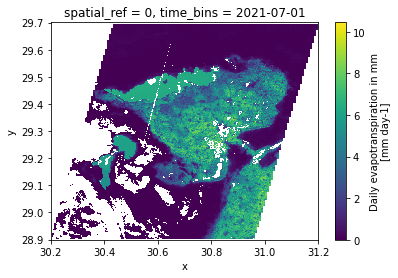

In [12]:
%matplotlib inline
ds_out.et_24_mm.isel(time_bins = 0).plot()

##### Custom inputs

Besides using the predefined levels, it is also possible to create your own level or customize an existing one. Instead of passing a string to the `sources` input parameter of `pywapor.pre_et_look.main`, we can also pass a dictionary that specifies which products we would like to use. Let's start with the basic `level_1` configuration and make some modifications.

In [13]:
level = "level_1"

et_look_sources = pywapor.general.levels.pre_et_look_levels(level)

et_look_sources["ndvi"]["products"] = [
    {'source': 'MODIS',
        'product_name': 'MOD13Q1.061',
        'enhancers': 'default'},
    {'source': 'MODIS', 
        'product_name': 'MYD13Q1.061', 
        'enhancers': 'default'},
    {'source': 'PROBAV',
        'product_name': 'S5_TOC_100_m_C1',
        'enhancers': 'default',
        'is_example': True}
]

et_look_sources["r0"]["products"] = [
    {'source': 'MODIS',
        'product_name': 'MCD43A3.061',
        'enhancers': 'default'},
    {'source': 'PROBAV',
        'product_name': 'S5_TOC_100_m_C1',
        'enhancers': 'default'}
]

With these changes, `ndvi` and `r0` (albedo) will be calculated based on three products, a combination of PROBAV and MODIS. At the resolution of PROBAV.

In [14]:
se_root_sources = pywapor.general.levels.pre_se_root_levels(level)
se_root_sources["ndvi"]["products"] = et_look_sources["ndvi"]["products"]

In [15]:
from functools import partial
et_look_sources["se_root"]["products"] = [
    {'source': partial(pywapor.se_root.se_root, sources = se_root_sources),
        'product_name': 'v2',
        'enhancers': 'default'},
]

In [16]:
ds = pywapor.pre_et_look.main(project_folder, latlim, lonlim, timelim, 
                                    sources = et_look_sources,
                                    bin_length = composite_length)

> PRE_ET_LOOK
    --> Example dataset is PROBAV.S5_TOC_100_m_C1.
    --> Collecting `ndvi` from MODIS.MOD13Q1.061.
    --> Applying 'mask_qa'.
    --> Collecting `ndvi` from MODIS.MYD13Q1.061.
    --> Applying 'mask_qa'.
    --> Collecting `ndvi`, `r0` from PROBAV.S5_TOC_100_m_C1.
    --> Collecting `r0` from MODIS.MCD43A3.061.
    --> Applying 'shortwave_r0'.
    --> Applying 'mask_qa'.
    --> Collecting `se_root` from `se_root`.
    > PRE_SE_ROOT
        --> Example dataset is PROBAV.S5_TOC_100_m_C1.
        --> Collecting `ndvi` from MODIS.MOD13Q1.061.
        --> Collecting `ndvi` from MODIS.MYD13Q1.061.
        --> Collecting `ndvi` from PROBAV.S5_TOC_100_m_C1.
        --> Collecting `lst` from MODIS.MOD11A1.061.
        --> Collecting `lst` from MODIS.MYD11A1.061.
        --> Collecting `t_air`, `t_air_max`, `t_air_min`, `u2m`, `v2m`, `qv`, `wv`, `p_air`, `p_air_0` from GEOS5.inst3_2d_asm_Nx.
        --> Collecting `r0_bare` from STATICS.r0_bare.
        --> Collecting `r0_full`

In [17]:
ds

<xarray.Dataset>
Dimensions:              (y: 808, x: 1009, time_bins: 1)
Coordinates:
    spatial_ref          int64 ...
  * y                    (y) float64 29.7 29.7 29.7 29.7 ... 28.9 28.9 28.9 28.9
  * x                    (x) float64 30.2 30.2 30.2 30.2 ... 31.2 31.2 31.2 31.2
  * time_bins            (time_bins) datetime64[ns] 2021-07-01
Data variables: (12/76)
    ndvi                 (time_bins, y, x) float64 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    r0                   (time_bins, y, x) float64 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    se_root              (time_bins, y, x) float64 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    p_24                 (time_bins, y, x) float32 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    z                    (y, x) float64 dask.array<chunksize=(808, 1009), meta=np.ndarray>
    ra_24                (time_bins, y, x) float32 dask.array<chunksize=(1, 808, 1009), meta=np.ndarray>
    ...                   ...
    fpar_slope           float64 ...
    fpar_offset          float64 ...
    o2                   float64 ...
    co2_ref              int64 ...
    gcgdm                float64 ...
    phot_eff             float64 ...

And then again, run `pwapor.et_look.main` like this.

In [18]:
ds = pywapor.et_look.main(ds)

> ET_LOOK
    --> Running `et_look` (v2).
    --> Calculating `declination`.
    --> Calculating `inverse_earth_sun_distance`.
    --> Calculating `vegetation_cover`.
    --> Calculating `leaf_area_index`.
    --> Calculating `effective_leaf_area_index`.
    --> Calculating `soil_fraction`.
    --> Calculating `latitude_rad`.
    --> Calculating `sunset_hour_angle`.
    --> Calculating `daily_solar_radiation_toa_flat`.
    --> Calculating `transmissivity`.
    --> Calculating `stress_radiation`.
    --> Calculating `air_pressure_kpa2mbar`.
    --> Calculating `air_pressure_daily`.
    --> Calculating `air_pressure`.
    --> Calculating `vapour_pressure_from_specific_humidity_daily`.
    --> Calculating `vapour_pressure_from_specific_humidity`.
    --> Calculating `saturated_vapour_pressure`.
    --> Calculating `vapour_pressure_deficit_daily`.
    --> Calculating `vapour_pressure_deficit`.
    --> Calculating `stress_vpd`.
    --> Calculating `stress_temperature`.
    --> Calculating `

Notice how the some nodata areas from before have been filled in thanks to temporal interpolation!

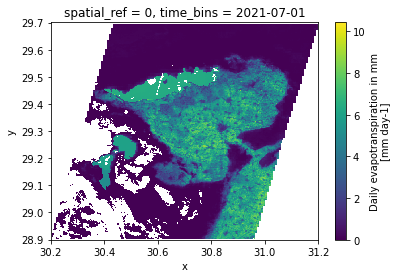

In [19]:
ds.et_24_mm.isel(time_bins =0 ).plot()